# Surf boards analyse


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso
import lightgbm as lgb
import xgboost as xgb

## Getting Data

In [2]:
import gdown

# URL to the file on Google Drive
google_drive_url = 'https://drive.google.com/uc?id=1-1N4FUmCErD3iaHkzEWu3XSzOvLTBrfM'

# Path to save the file
output_path = '/content/df_surf.csv'

# Download and save the file
gdown.download(google_drive_url, output_path, quiet=False)

# Check if the file has been downloaded
import os
if os.path.exists(output_path):
    print(f"The file has been downloaded and saved as {output_path}")
else:
    print("Downloading the file failed.")


Downloading...
From: https://drive.google.com/uc?id=1-1N4FUmCErD3iaHkzEWu3XSzOvLTBrfM
To: /content/df_surf.csv
100%|██████████| 50.3k/50.3k [00:00<00:00, 39.3MB/s]

The file has been downloaded and saved as /content/df_surf.csv


In [3]:
# Load the data
df_surf = pd.read_csv('/content/df_surf.csv')

# Display the first few rows of the data
df_surf.head()

,board_adequate,board_how_many,board_length,board_nose_shape,board_tail_shape,board_thickness,board_type,board_volume,board_width,manoeuvres_01_paddling,...,surfer_gender,surfer_height,surfer_style,surfer_weight,wave_height,wave_shape,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
0,More or less,5.0,1.80,Pointed,"Outward (Round, Round-Pin, Pin)",2.31,Shortboard,26.7,18.31,Always,...,Male,1.72,Neutral,78.0,3.0,Spilling/Plunging,3.0,3.0,3.0,0.0
1,More or less,1.0,1.93,Pointed,"Neutral (Squash, Square)",NaN,All-around,NaN,NaN,Usually,...,Female,1.58,Smooth (recreative),54.0,2.0,Spilling,2.0,2.0,2.0,0.0
2,Very suitable,3.0,1.73,Pointed,"Neutral (Squash, Square)",2.56,Shortboard,30.5,20.38,Always,...,Male,1.73,Neutral,75.0,2.5,"Spilling, Spilling/Plunging, Plunging",2.0,5.0,3.5,3.0
3,Very suitable,1.0,1.80,Pointed,"Neutral (Squash, Square)",2.44,Shortboard,30.6,19.38,Always,...,Male,1.76,Neutral,76.0,3.6,"Spilling, Spilling/Plunging, Plunging",3.0,6.0,4.5,3.0
4,Suitable,5.0,1.78,Pointed,"Inward (Fish-tail, Swallow, Bat wing, Half moon)",NaN,All-around,NaN,NaN,Always,...,Male,1.77,Neutral,84.0,5.0,Spilling/Plunging,5.0,5.0,5.0,0.0


In [4]:
# Basic statistics for the numeric columns
df_surf.describe()

,board_how_many,board_length,board_thickness,board_volume,board_width,performance_manoeuvrability,surfer_age,surfer_height,surfer_weight,wave_height,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
count,158.000000,156.000000,106.000000,101.000000,108.000000,162.000000,161.000000,163.000000,161.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3.234177,1.812308,2.469528,30.852970,19.434722,0.776173,34.571429,1.757301,75.152174,3.893865,3.748466,4.276074,4.012270,0.527607
std,4.850855,0.122379,0.244425,7.819819,0.983315,0.205693,7.927574,0.073283,10.538774,1.040696,1.101870,1.049917,0.971747,0.925048
min,1.000000,1.550000,2.000000,22.000000,18.000000,0.170000,16.000000,1.570000,36.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,2.000000,1.750000,2.310000,27.000000,18.750000,0.670000,29.000000,1.710000,70.000000,3.000000,3.000000,4.000000,3.000000,0.000000
50%,2.000000,1.800000,2.380000,28.800000,19.250000,0.830000,33.000000,1.760000,75.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,4.000000,1.850000,2.590000,32.300000,19.782500,1.000000,39.000000,1.800000,80.000000,5.000000,5.000000,5.000000,5.000000,1.000000
max,60.000000,2.440000,3.630000,83.500000,22.500000,1.000000,57.000000,1.940000,120.000000,6.000000,6.000000,6.000000,6.000000,4.000000


## Data Cleaning And Feature Engineering


In [5]:
# Indo about data
df_surf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   board_adequate                164 non-null    object 
 1   board_how_many                158 non-null    float64
 2   board_length                  156 non-null    float64
 3   board_nose_shape              164 non-null    object 
 4   board_tail_shape              164 non-null    object 
 5   board_thickness               106 non-null    float64
 6   board_type                    164 non-null    object 
 7   board_volume                  101 non-null    float64
 8   board_width                   108 non-null    float64
 9   manoeuvres_01_paddling        162 non-null    object 
 10  manoeuvres_02_drop            162 non-null    object 
 11  manoeuvres_03_straight_ahead  145 non-null    object 
 12  manoeuvres_04_wall_riding     161 non-null    object 
 13  manoe

In [6]:
# Analysis of missing values
missing_values = df_surf.isnull().sum()
missing_percentage = (df_surf.isnull().sum() / df_surf.shape[0]) * 100

# Creating a DataFrame with information on missing values
missing_data = pd.DataFrame({
    'Total missing values': missing_values,
    'Percentage of missing values': missing_percentage
})

# Sorting the DataFrame to show columns with the highest number of missing values
missing_data = missing_data.sort_values(by='Percentage of missing values', ascending=False)
print(missing_data.head(10))

                              Total missing values  \
board_volume                                    63   
board_thickness                                 58   
board_width                                     56   
manoeuvres_03_straight_ahead                    19   
manoeuvres_10_air                                9   
board_length                                     8   
board_how_many                                   6   
performance_hold                                 4   
surfer_weight                                    3   
manoeuvres_04_wall_riding                        3   

                              Percentage of missing values  
board_volume                                     38.414634  
board_thickness                                  35.365854  
board_width                                      34.146341  
manoeuvres_03_straight_ahead                     11.585366  
manoeuvres_10_air                                 5.487805  
board_length                           

In [7]:
# Replace missing values in numeric columns with the median
for column in df_surf.select_dtypes(include=['float64', 'int64']):
    df_surf[column].fillna(df_surf[column].median(), inplace=True)


In [8]:
# Replace missing values in categorical columns with the mode
for column in df_surf.select_dtypes(include=['object']):
    df_surf[column].fillna(df_surf[column].mode()[0], inplace=True)

In [9]:
# Apply label encoding to categorical columns
label_encoders = {}
for column in df_surf.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_surf[column] = le.fit_transform(df_surf[column])
    label_encoders[column] = le


In [10]:
# # Normalize the features using StandardScaler
# scaler = StandardScaler()
# df_processed = pd.DataFrame(scaler.fit_transform(df_surf), columns=df_surf.columns)

# df_processed.head()

In [26]:
df_surf.to_csv('your_dataframe.csv', index=False)

## Surfing Performance Factors Visualisation


### Setting Features And Targets

In [11]:
# Extract feature and target columns from the dataframe
targets = ['performance_ease_paddling', 'performance_flotation', 'performance_hold',
          'performance_manoeuvrability', 'performance_passing_through',
          'performance_stability', 'performance_surf_speed', 'performance_control']


target = df_surf[targets]
features = df_surf.drop(target, axis=1)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

target.info(), features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   performance_ease_paddling    164 non-null    int64  
 1   performance_flotation        164 non-null    int64  
 2   performance_hold             164 non-null    int64  
 3   performance_manoeuvrability  164 non-null    float64
 4   performance_passing_through  164 non-null    int64  
 5   performance_stability        164 non-null    int64  
 6   performance_surf_speed       164 non-null    int64  
 7   performance_control          164 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 10.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   board_adequate                164 non

(None, None)

In [12]:
def plot_feature_importance(model_class, params, X, y, target_name, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []
    mae_scores = []
    feature_importance_dfs = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model = model_class(**params)
        model.fit(X_train_fold, y_train_fold)

        predictions = model.predict(X_test_fold)
        rmse_scores.append(mean_squared_error(y_test_fold, predictions, squared=False))
        mae_scores.append(mean_absolute_error(y_test_fold, predictions))

        feature_importance = model.feature_importances_ if hasattr(model, "feature_importances_") else model.coef_

        feature_importances = pd.DataFrame({
            'column': X.columns,
            'feature_importance': feature_importance
        })
        feature_importance_dfs.append(feature_importances)

    # Average feature importance
    df_feature_importance = pd.concat(feature_importance_dfs)
    order = df_feature_importance.groupby('column').sum().sort_values(by='feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=df_feature_importance, x='feature_importance', y='column', order=order, ax=ax, palette='viridis', orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title(f'Feature Importances for {target_name} using {model_name}')
    ax.grid()
    fig.tight_layout()

    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)

    print(f"Average RMSE for {model_name} on {target_name}: {avg_rmse:.4f}")
    print(f"Average MAE for {model_name} on {target_name}: {avg_mae:.4f}")
    print("-" * 50)

    return avg_rmse, avg_mae


### Random Forest Model

Average RMSE for Random Forest on performance_ease_paddling: 1.2004
Average MAE for Random Forest on performance_ease_paddling: 1.0600
--------------------------------------------------
Average RMSE for Random Forest on performance_flotation: 1.3622
Average MAE for Random Forest on performance_flotation: 1.1738
--------------------------------------------------
Average RMSE for Random Forest on performance_hold: 1.2688
Average MAE for Random Forest on performance_hold: 1.1025
--------------------------------------------------
Average RMSE for Random Forest on performance_manoeuvrability: 0.1501
Average MAE for Random Forest on performance_manoeuvrability: 0.1180
--------------------------------------------------
Average RMSE for Random Forest on performance_passing_through: 1.2299
Average MAE for Random Forest on performance_passing_through: 1.0223
--------------------------------------------------
Average RMSE for Random Forest on performance_stability: 1.1760
Average MAE for Random F

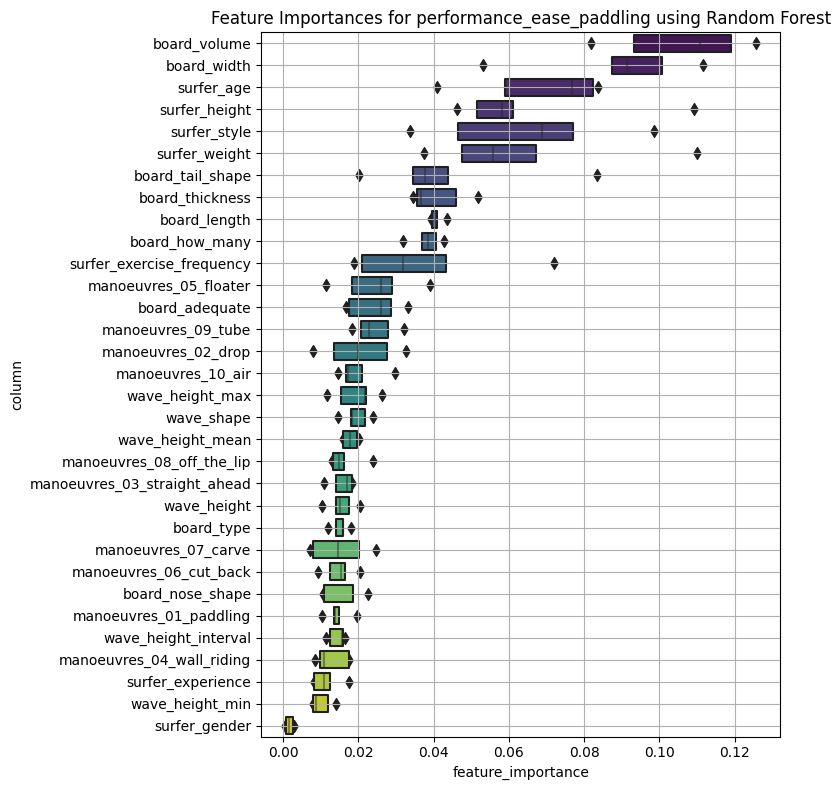

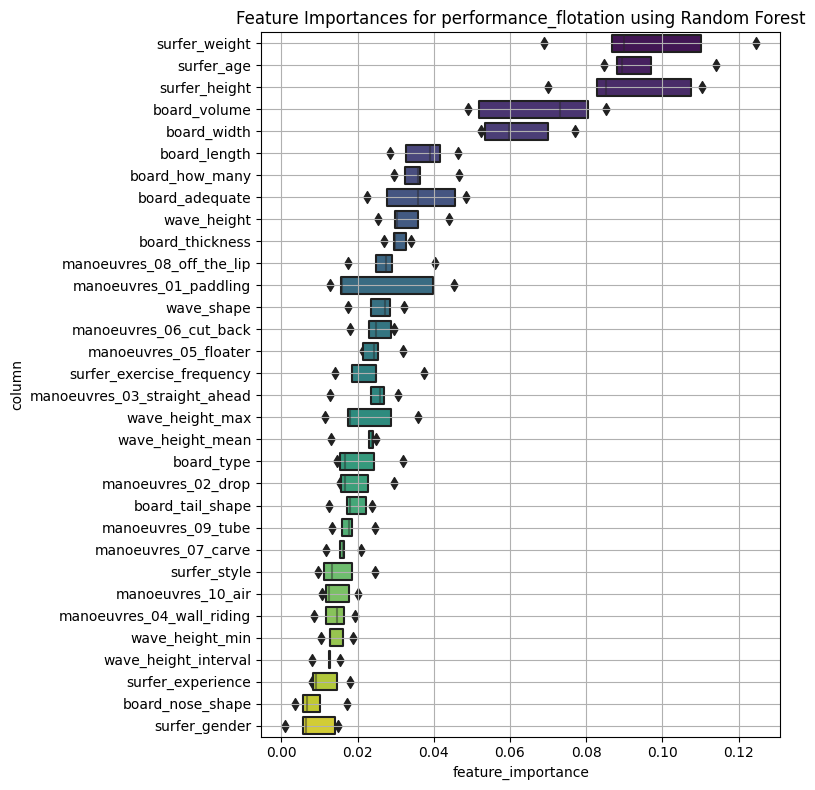

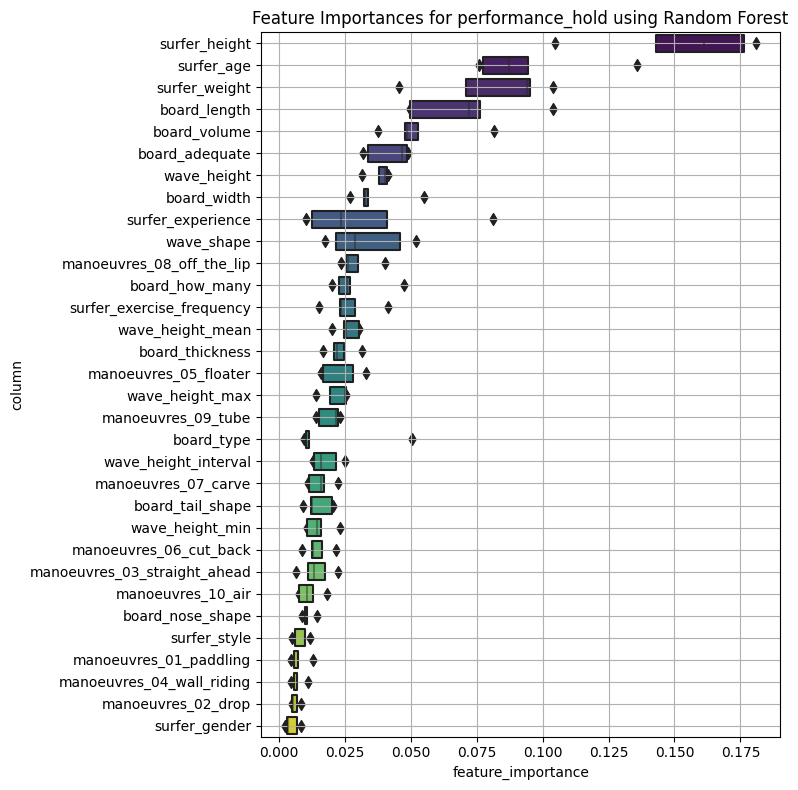

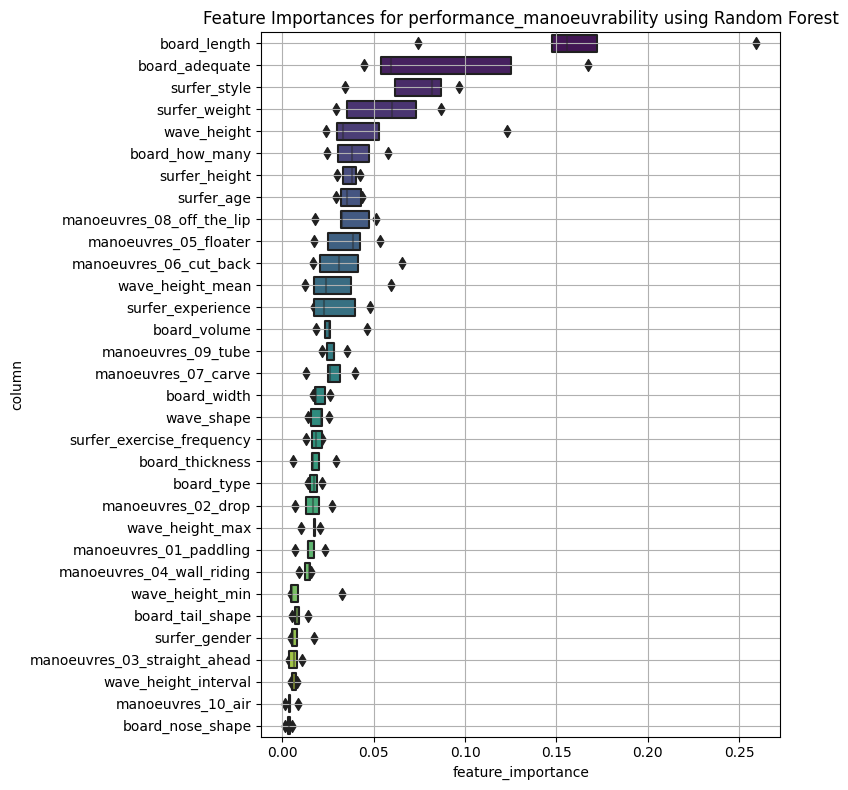

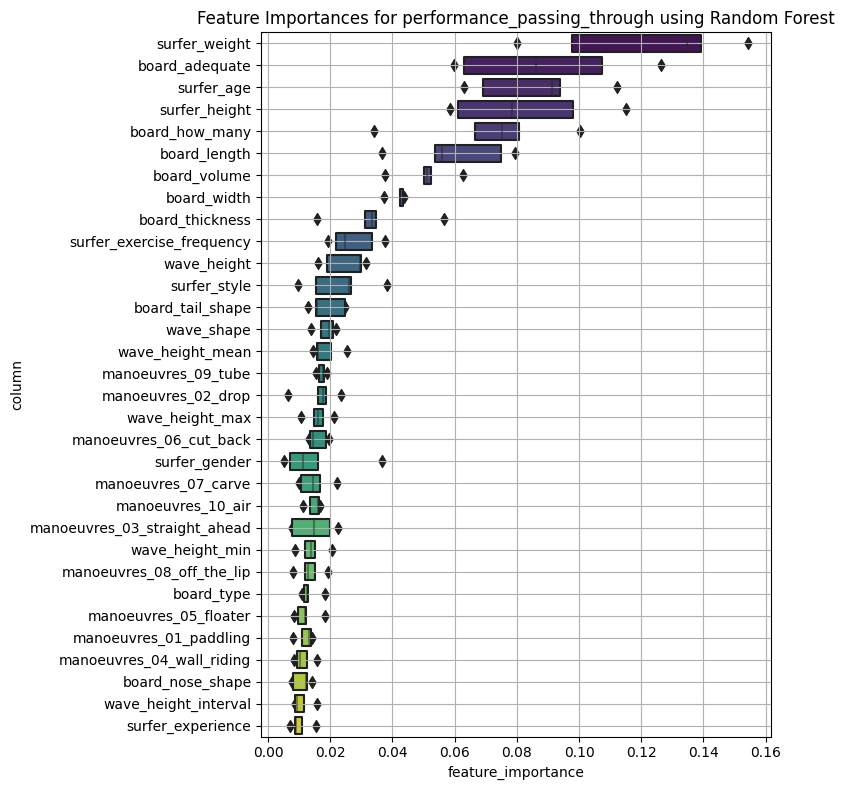

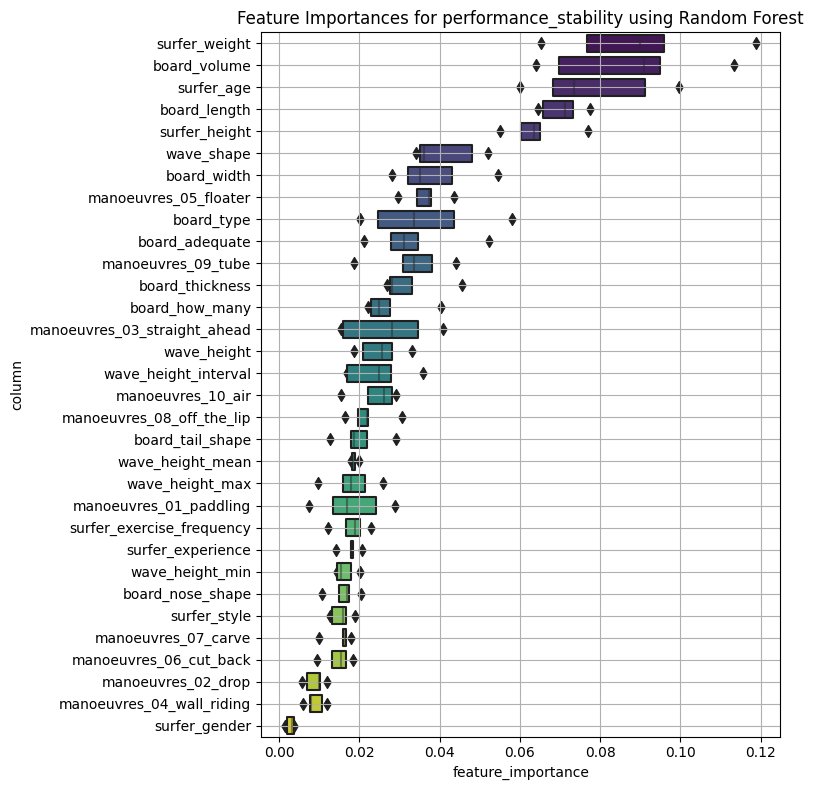

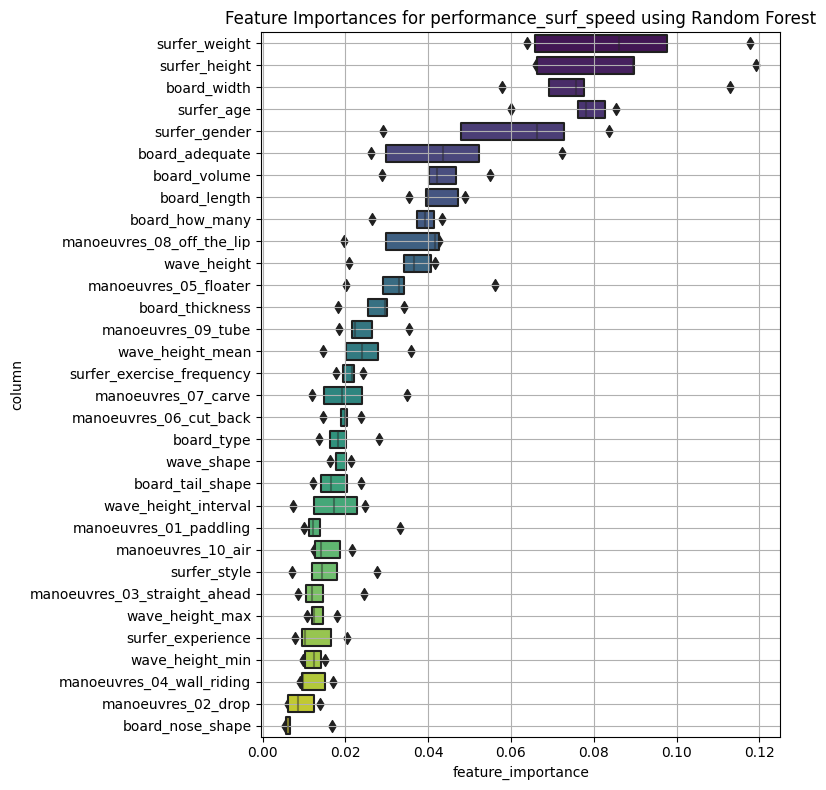

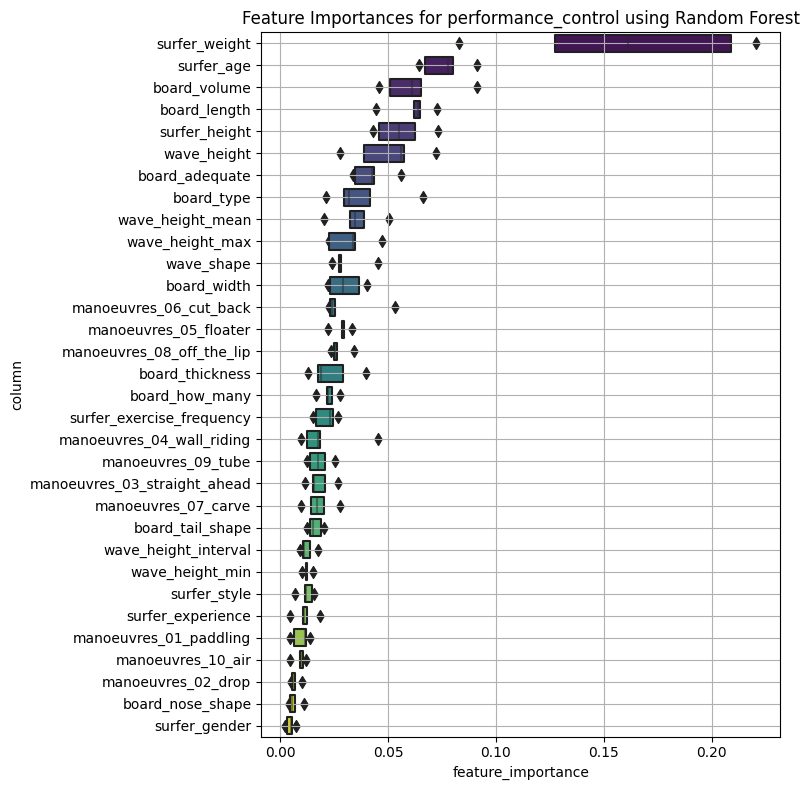

In [13]:
params_rf = {
    'n_estimators': 100,
    'random_state': 42
}

for target_column in targets:
    plot_feature_importance(RandomForestRegressor, params_rf, X_train, y_train[target_column], target_column, model_name='Random Forest')


### XGBoost Model

Average RMSE for XGBoost on performance_ease_paddling: 1.3867
Average MAE for XGBoost on performance_ease_paddling: 1.1565
--------------------------------------------------
Average RMSE for XGBoost on performance_flotation: 1.5775
Average MAE for XGBoost on performance_flotation: 1.2924
--------------------------------------------------
Average RMSE for XGBoost on performance_hold: 1.3609
Average MAE for XGBoost on performance_hold: 1.0967
--------------------------------------------------
Average RMSE for XGBoost on performance_manoeuvrability: 0.1719
Average MAE for XGBoost on performance_manoeuvrability: 0.1315
--------------------------------------------------
Average RMSE for XGBoost on performance_passing_through: 1.3586
Average MAE for XGBoost on performance_passing_through: 1.0864
--------------------------------------------------
Average RMSE for XGBoost on performance_stability: 1.2503
Average MAE for XGBoost on performance_stability: 1.0510
---------------------------------

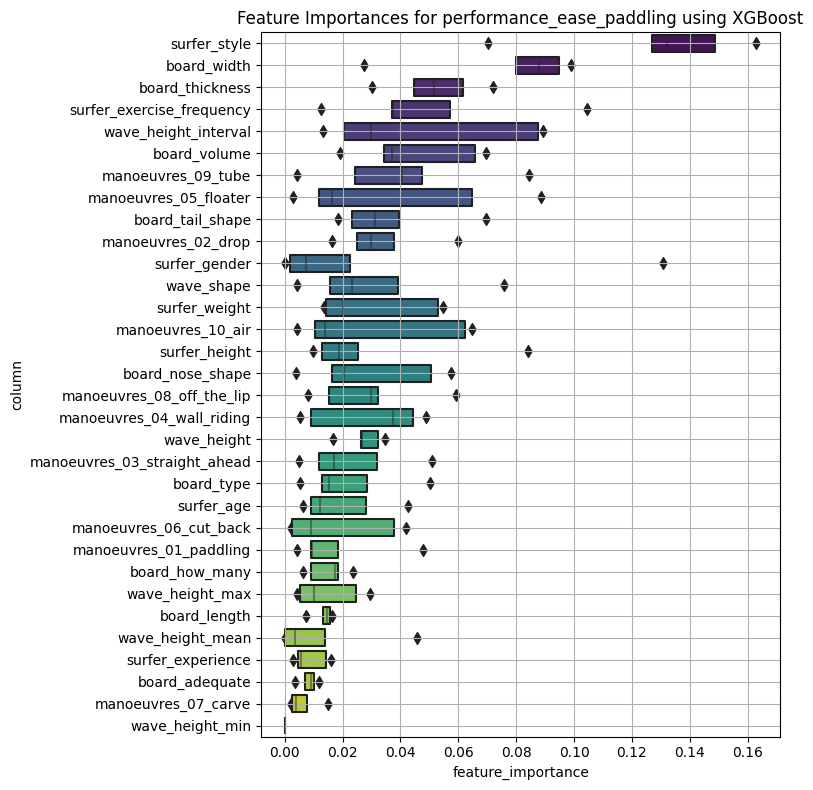

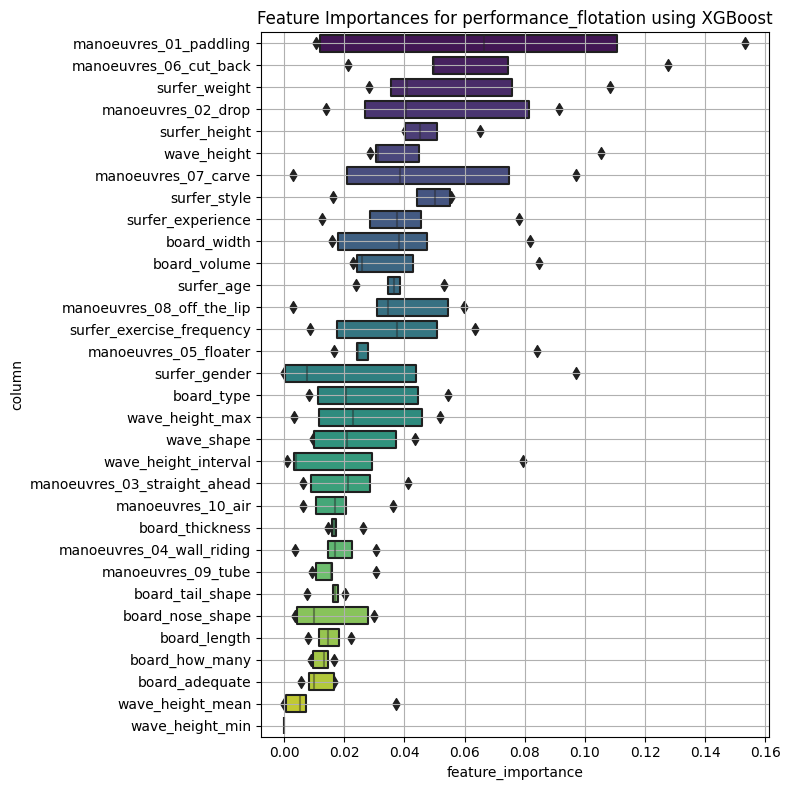

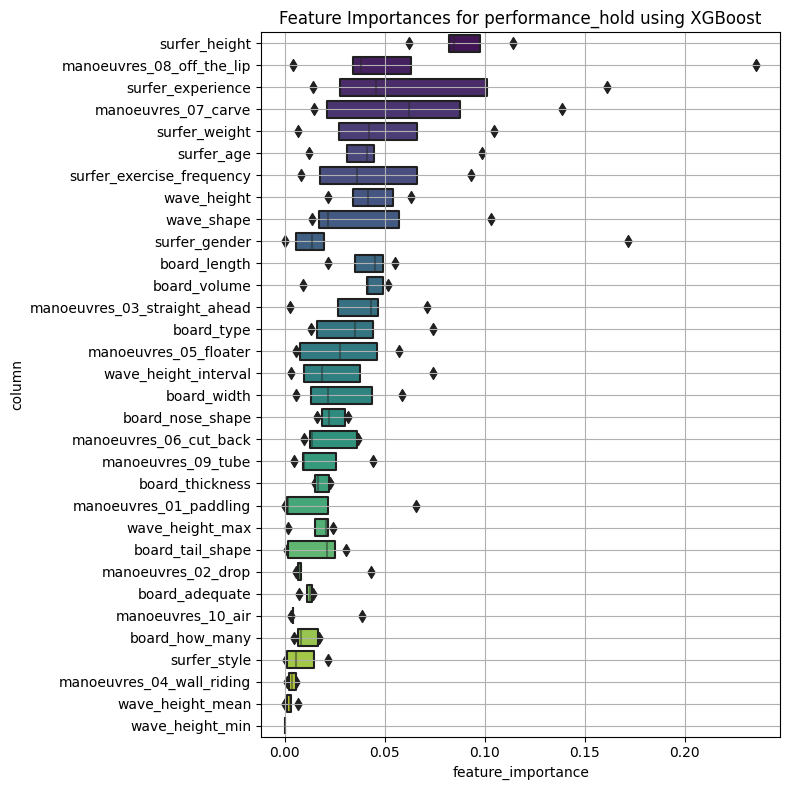

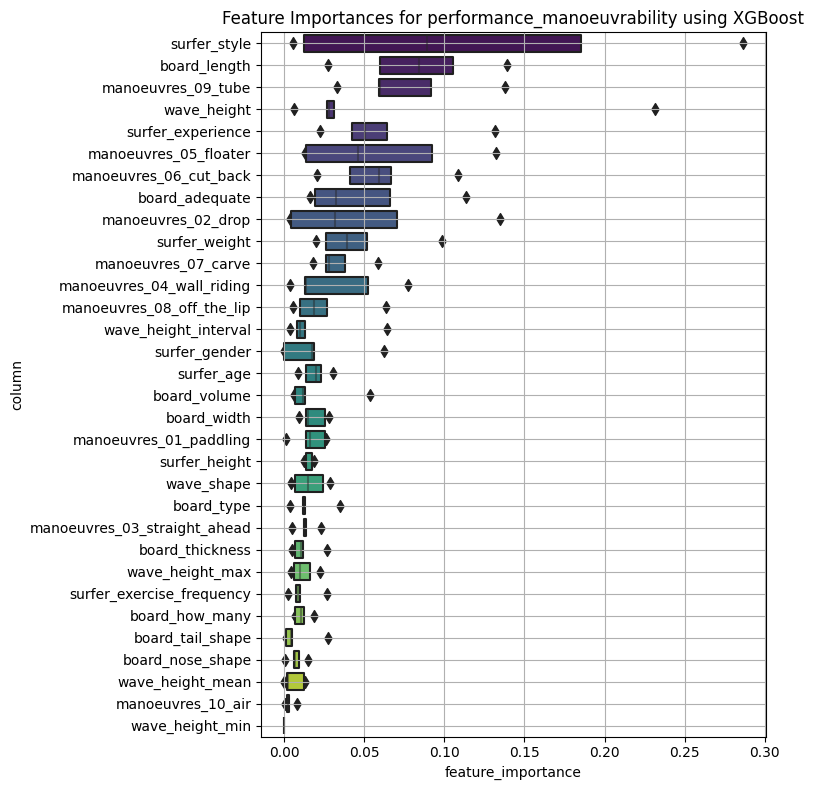

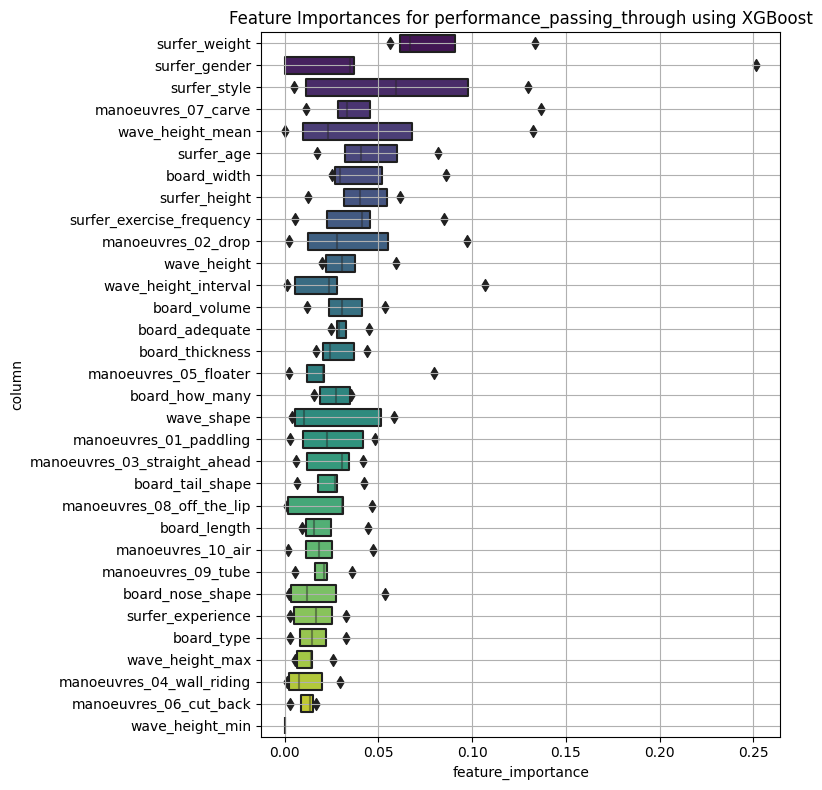

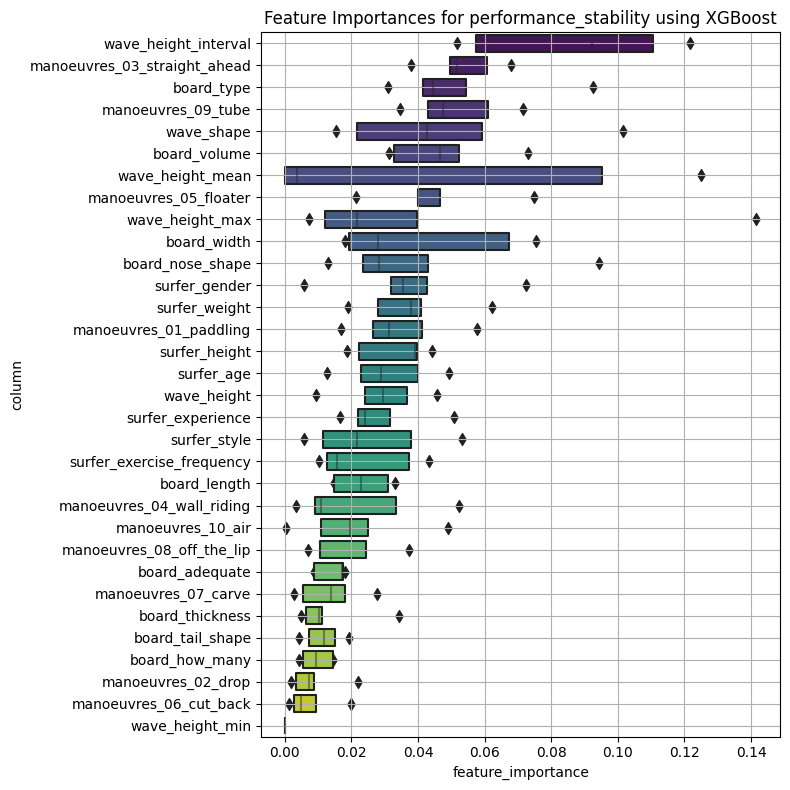

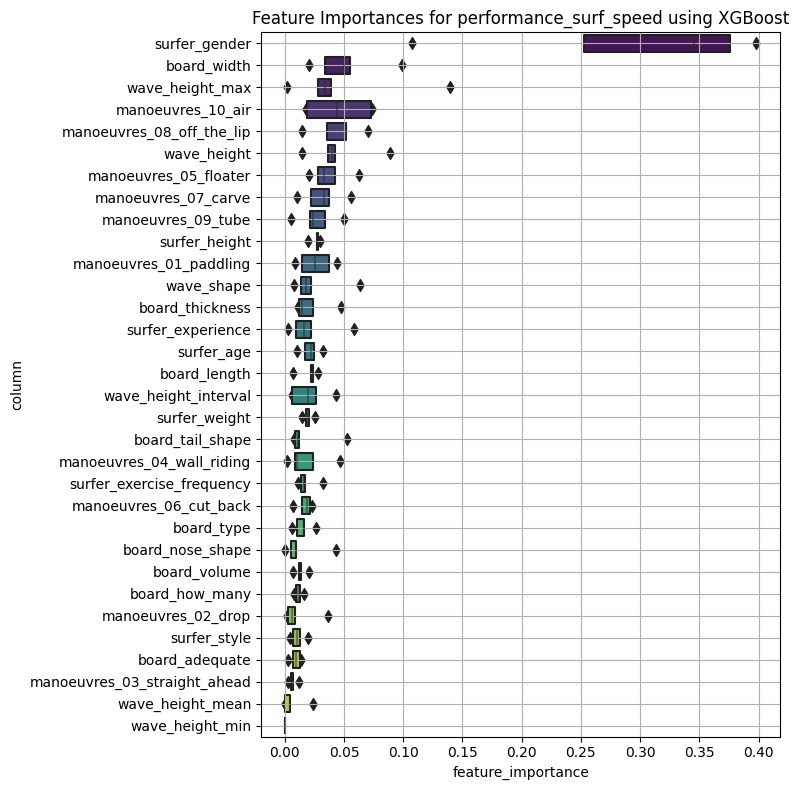

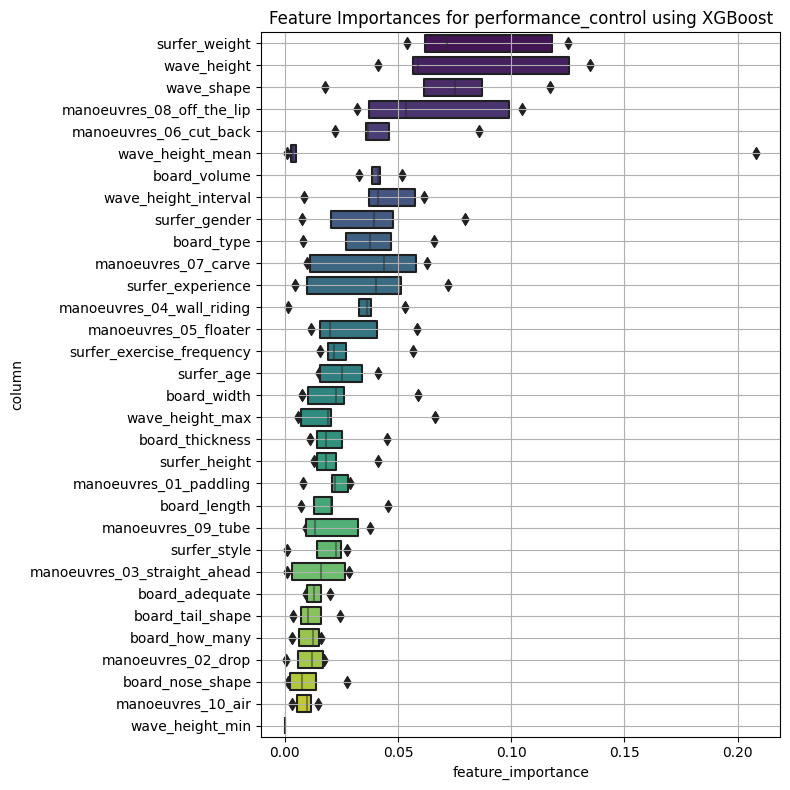

In [14]:
import xgboost as xgb

params_xgb = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'random_state': 42
}

for target_column in targets:
    plot_feature_importance(xgb.XGBRegressor, params_xgb, X_train, y_train[target_column], target_column, model_name='XGBoost')


### LightGBM Model

Average RMSE for LightGBM on performance_ease_paddling: 1.2010
Average MAE for LightGBM on performance_ease_paddling: 1.0059
--------------------------------------------------
Average RMSE for LightGBM on performance_flotation: 1.4607
Average MAE for LightGBM on performance_flotation: 1.2234
--------------------------------------------------
Average RMSE for LightGBM on performance_hold: 1.3185
Average MAE for LightGBM on performance_hold: 1.1090
--------------------------------------------------
Average RMSE for LightGBM on performance_manoeuvrability: 0.1588
Average MAE for LightGBM on performance_manoeuvrability: 0.1268
--------------------------------------------------
Average RMSE for LightGBM on performance_passing_through: 1.2994
Average MAE for LightGBM on performance_passing_through: 1.0654
--------------------------------------------------
Average RMSE for LightGBM on performance_stability: 1.2258
Average MAE for LightGBM on performance_stability: 1.0456
---------------------

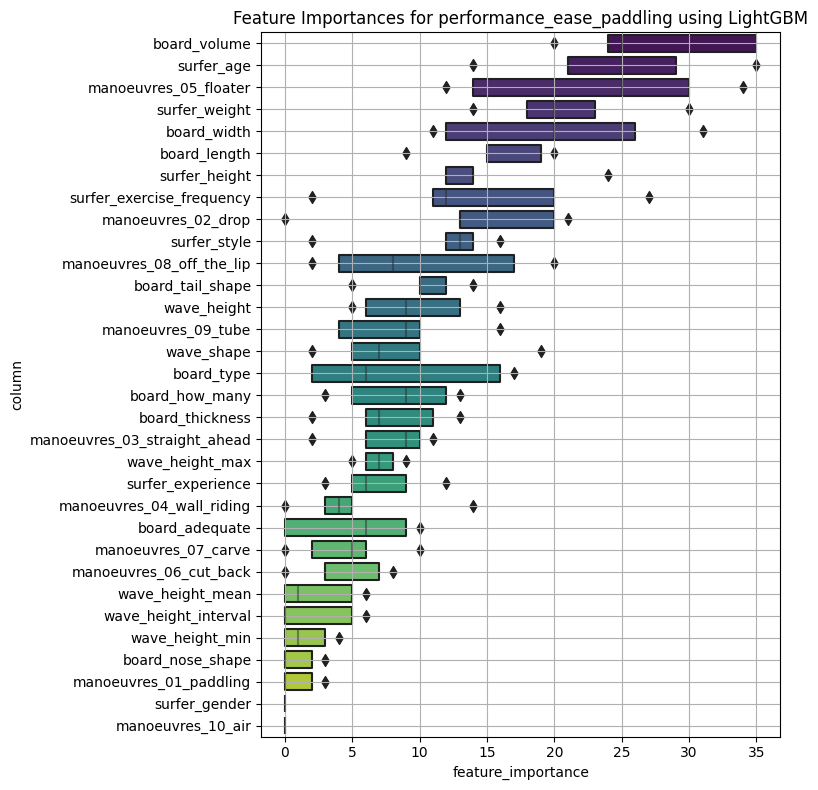

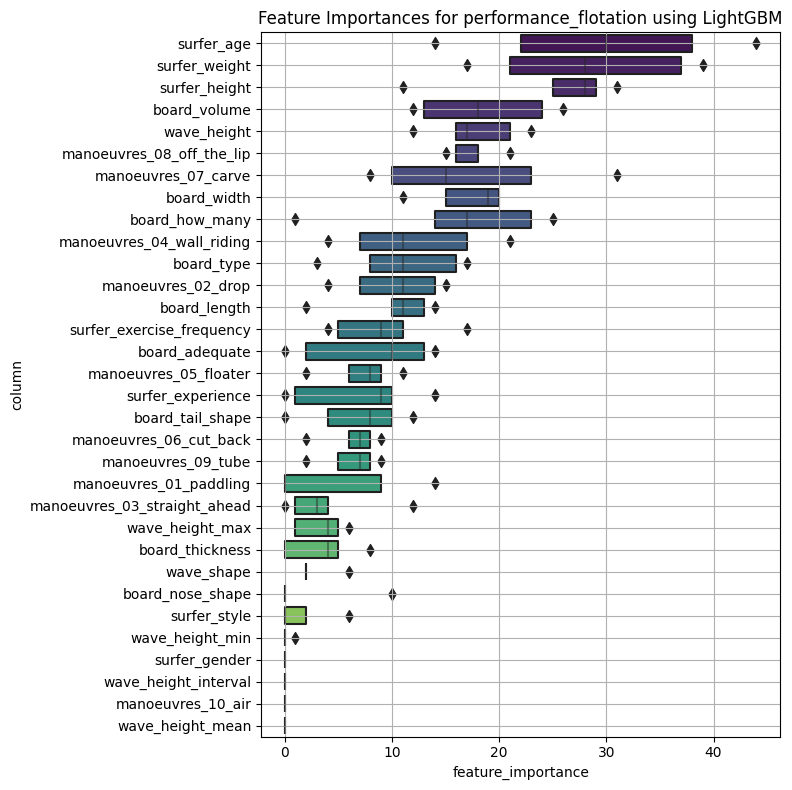

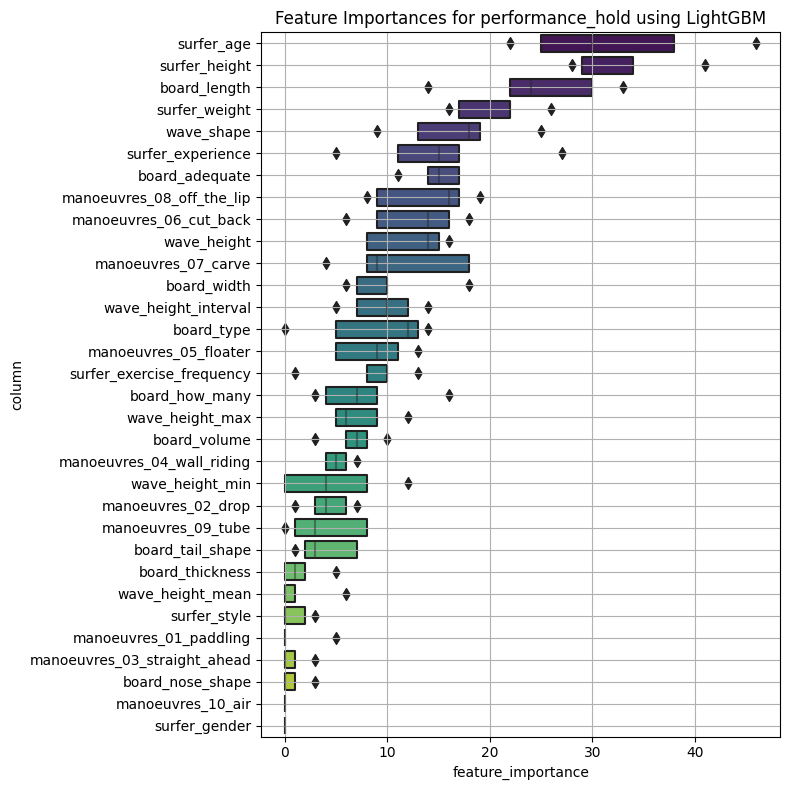

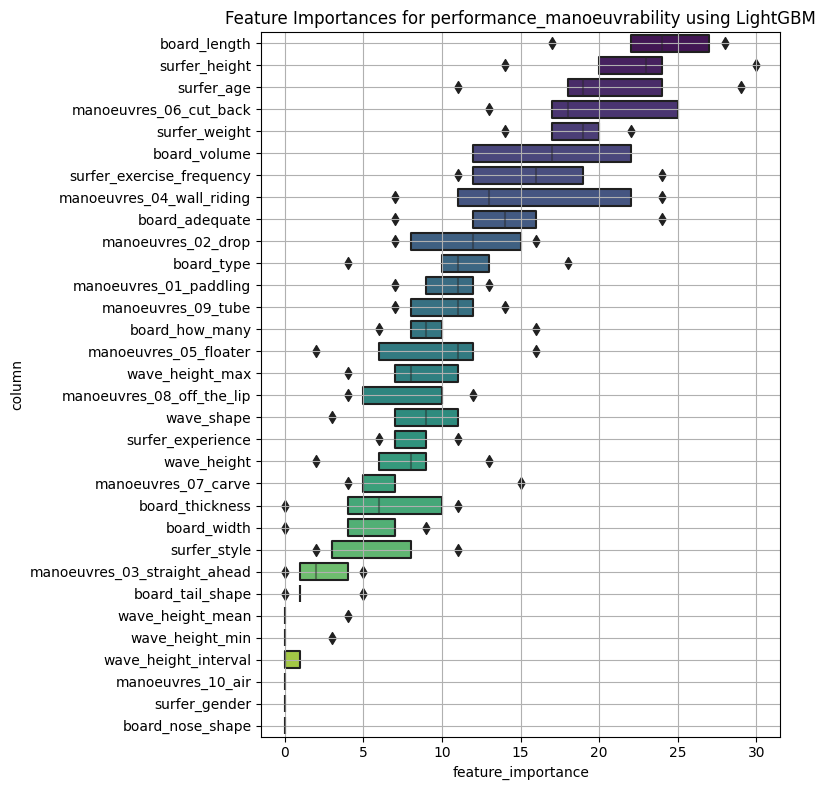

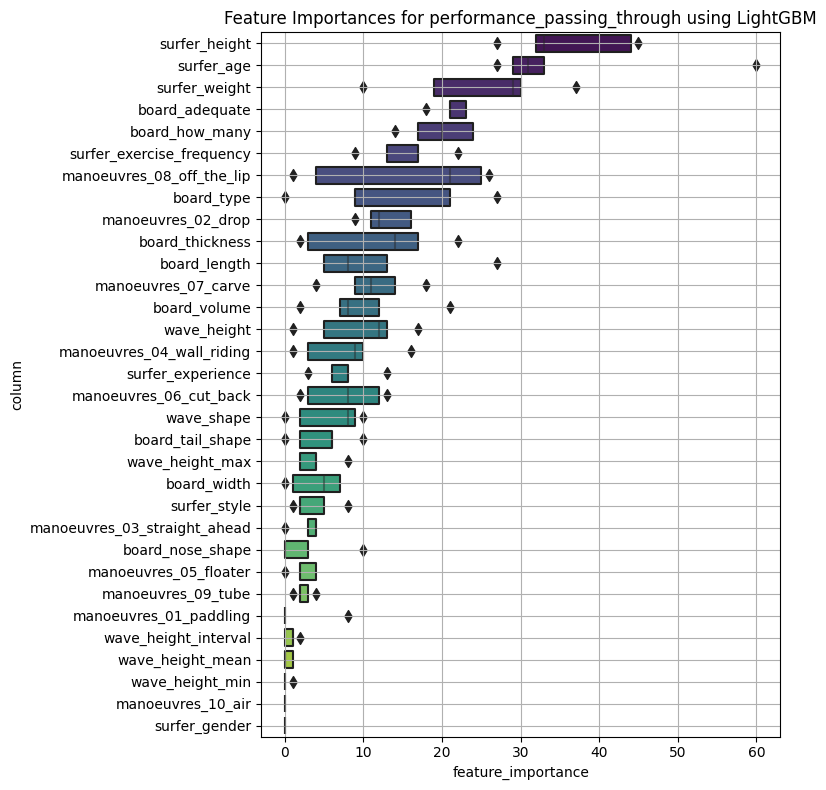

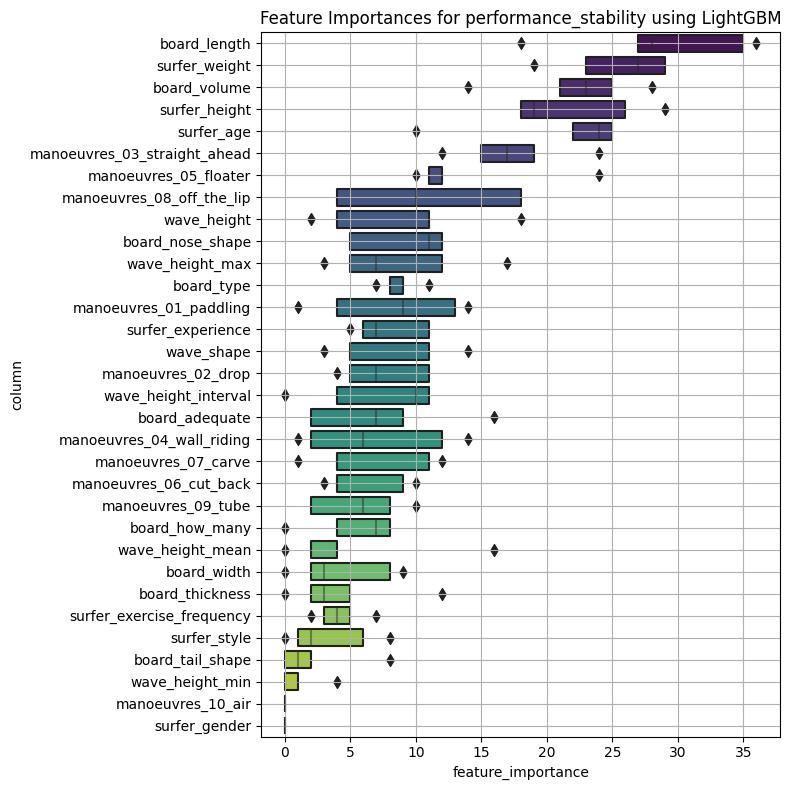

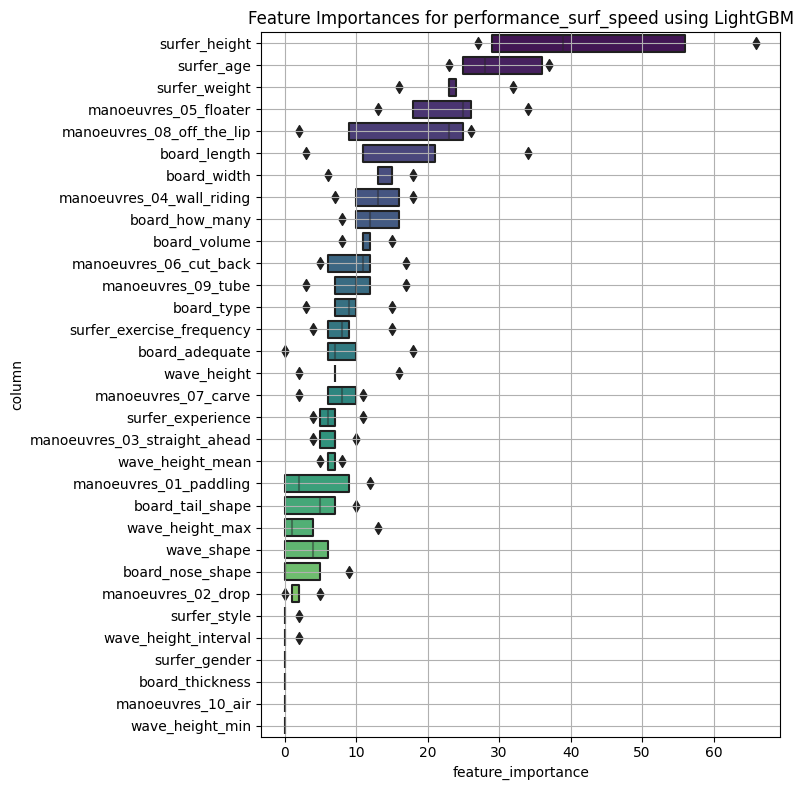

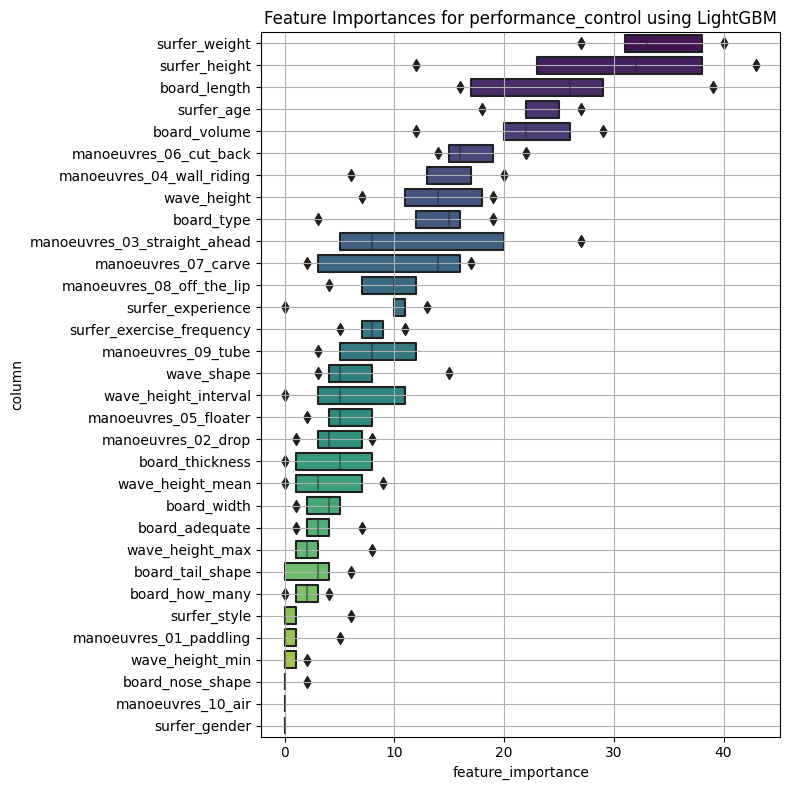

In [15]:
params = {
    'n_estimators': 100,
    'random_state': 42,
    'verbose': -1
}

for target_column in targets:
    plot_feature_importance(lgb.LGBMRegressor, params, X_train, y_train[target_column], target_column, model_name='LightGBM')


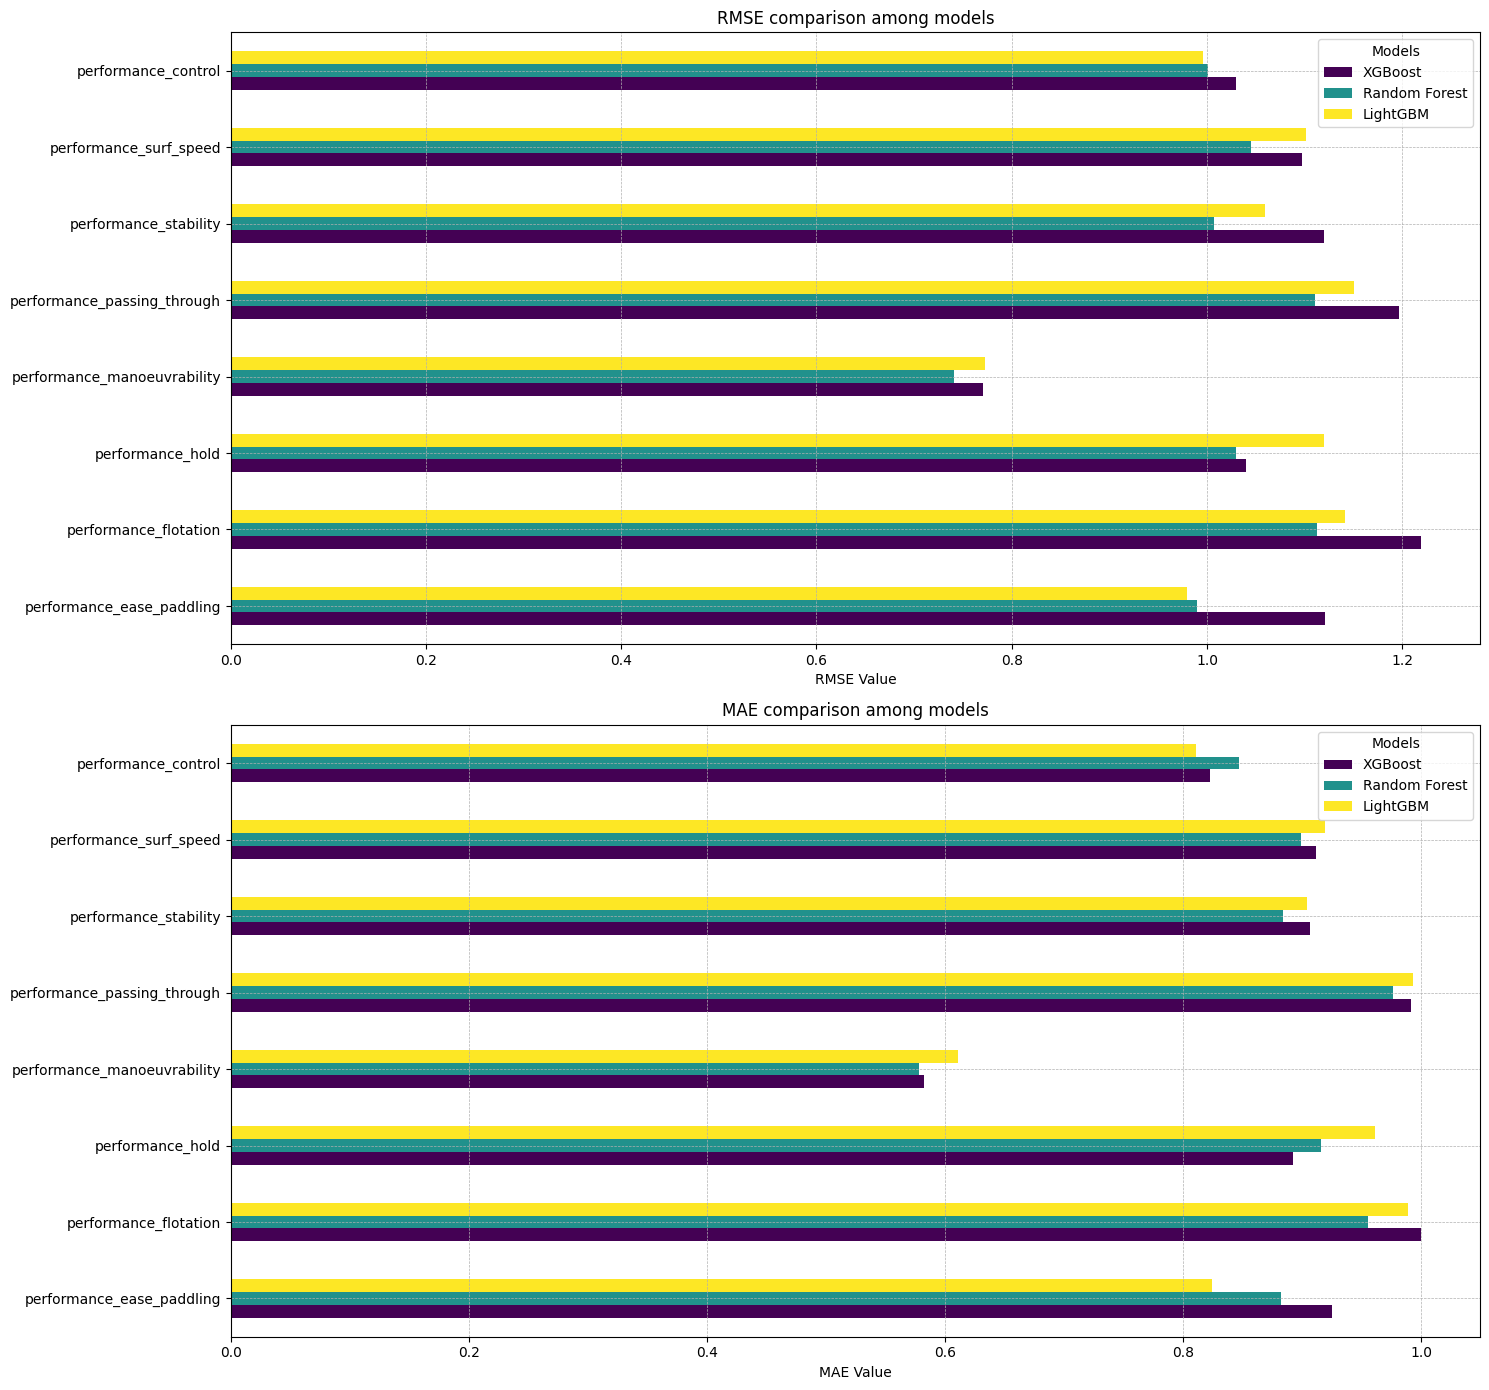

In [16]:
# Given data
results = {
    "XGBoost": {
        "performance_ease_paddling": {"RMSE": 1.1213, "MAE": 0.9245},
        "performance_flotation": {"RMSE": 1.2187, "MAE": 0.9992},
        "performance_hold": {"RMSE": 1.0404, "MAE": 0.8924},
        "performance_manoeuvrability": {"RMSE": 0.7701, "MAE": 0.5819},
        "performance_passing_through": {"RMSE": 1.1968, "MAE": 0.9916},
        "performance_stability": {"RMSE": 1.1196, "MAE": 0.9066},
        "performance_surf_speed": {"RMSE": 1.0975, "MAE": 0.9118},
        "performance_control": {"RMSE": 1.0297, "MAE": 0.8222}
    },
    "Random Forest": {
        "performance_ease_paddling": {"RMSE": 0.9893, "MAE": 0.8817},
        "performance_flotation": {"RMSE": 1.1131, "MAE": 0.9549},
        "performance_hold": {"RMSE": 1.0298, "MAE": 0.9158},
        "performance_manoeuvrability": {"RMSE": 0.7408, "MAE": 0.5778},
        "performance_passing_through": {"RMSE": 1.1111, "MAE": 0.9763},
        "performance_stability": {"RMSE": 1.0072, "MAE": 0.8835},
        "performance_surf_speed": {"RMSE": 1.0454, "MAE": 0.8986},
        "performance_control": {"RMSE": 1.0010, "MAE": 0.8465}
    },
    "LightGBM": {
        "performance_ease_paddling": {"RMSE": 0.9800, "MAE": 0.8240},
        "performance_flotation": {"RMSE": 1.1417, "MAE": 0.9886},
        "performance_hold": {"RMSE": 1.1196, "MAE": 0.9613},
        "performance_manoeuvrability": {"RMSE": 0.7727, "MAE": 0.6106},
        "performance_passing_through": {"RMSE": 1.1503, "MAE": 0.9929},
        "performance_stability": {"RMSE": 1.0597, "MAE": 0.9040},
        "performance_surf_speed": {"RMSE": 1.1010, "MAE": 0.9194},
        "performance_control": {"RMSE": 0.9957, "MAE": 0.8105}
    }
}

# Convert the nested dictionary to DataFrame
df_results_rmse = pd.DataFrame({model: {target: values["RMSE"] for target, values in model_results.items()} for model, model_results in results.items()})
df_results_mae = pd.DataFrame({model: {target: values["MAE"] for target, values in model_results.items()} for model, model_results in results.items()})

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 14))

df_results_rmse.plot(kind='barh', ax=axes[0], title="RMSE comparison among models", colormap='viridis')
df_results_mae.plot(kind='barh', ax=axes[1], title="MAE comparison among models", colormap='viridis')

axes[0].set_xlabel('RMSE Value')
axes[1].set_xlabel('MAE Value')
axes[0].legend(title="Models")
axes[1].legend(title="Models")

# Add grid to the plots
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()




In [17]:
# Calculate the average RMSE and MAE for each model
average_rmse = df_results_rmse.mean(axis=0)
average_mae = df_results_mae.mean(axis=0)

# Find the model with the lowest average RMSE and MAE
best_model_rmse = average_rmse.idxmin()
best_model_mae = average_mae.idxmin()

print(f"Model with the lowest average RMSE: {best_model_rmse} (RMSE: {average_rmse[best_model_rmse]:.4f})")
print(f"Model with the lowest average MAE: {best_model_mae} (MAE: {average_mae[best_model_mae]:.4f})")


Model with the lowest average RMSE: Random Forest (RMSE: 1.0047)
Model with the lowest average MAE: Random Forest (MAE: 0.8669)


In [18]:
# 1. Dla każdego celu, wyznacz ważność cech
feature_importances_list = []

for target_column in targets:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[target_column])
    feature_importances_list.append(rf.feature_importances_)

# 2. Uzyskaj średnią ważność cech dla wszystkich celów
average_importance = np.mean(np.array(feature_importances_list), axis=0)
features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': average_importance
})

# 3. Usuń te cechy, które mają ważność poniżej pewnego ustalonego progu
threshold = features_df['importance'].mean()  # używamy średniej ważności jako progu
selected_features = features_df[features_df['importance'] > threshold]['feature'].tolist()

print(f"Selected features based on importance: {selected_features}")


Selected features based on importance: ['board_adequate', 'board_how_many', 'board_length', 'board_volume', 'board_width', 'surfer_age', 'surfer_height', 'surfer_weight', 'wave_height']


In [19]:
from sklearn.feature_selection import RFE

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=15)  # Selecting top 15 features, you can adjust this number

# Fit RFE
rfe = rfe.fit(X_train, y_train['performance_ease_paddling'])  # We can select one target to start, or average results for all

# Get the features ranking
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})

# Selected features are ranked as 1
selected_features = ranking_df[ranking_df['Ranking'] == 1]['Feature'].tolist()

print(f"Selected features based on RFE: {selected_features}")


Selected features based on RFE: ['board_adequate', 'board_how_many', 'board_length', 'board_tail_shape', 'board_thickness', 'board_volume', 'board_width', 'manoeuvres_05_floater', 'manoeuvres_09_tube', 'surfer_age', 'surfer_exercise_frequency', 'surfer_height', 'surfer_style', 'surfer_weight', 'wave_height_mean']


## Predicting surfboard parameters based on surfer parameters


In [20]:
# Selected features and targets based on previous messages
features = [
    'surfer_age', 'surfer_exercise_frequency', 'surfer_experience',
    'surfer_gender', 'surfer_height', 'surfer_style',
    'surfer_weight', 'wave_height'
]

targets = [
    'board_length', 'board_nose_shape', 'board_tail_shape',
    'board_thickness', 'board_type', 'board_volume', 'board_width'
]

# Extracting the features and targets
features = df_surf[features]
target = df_surf[targets]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Displaying the info
features.info(), target.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   surfer_age                 164 non-null    float64
 1   surfer_exercise_frequency  164 non-null    int64  
 2   surfer_experience          164 non-null    int64  
 3   surfer_gender              164 non-null    int64  
 4   surfer_height              164 non-null    float64
 5   surfer_style               164 non-null    int64  
 6   surfer_weight              164 non-null    float64
 7   wave_height                164 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 10.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   board_length      164 non-null    float64
 1   board_nose_shape  164 non-null    i

(None, None)

In [21]:
# 1. Initialize the model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# 2. Train the model
model.fit(X_train, y_train)

# 3. Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
rmse = np.sqrt(mse)

# Display the errors
mse, rmse

(array([7.23080333e-03, 5.37112121e-01, 6.30448485e-01, 1.53410715e-02,
        5.06730909e+00, 2.16281908e+01, 4.22069003e-01]),
 array([0.08503413, 0.73287934, 0.79400786, 0.12385908, 2.25106843,
        4.65061187, 0.64966838]))

### Hyperparameter tuning


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# Define the hyperparameter space to search through
param_distributions = {
    "estimator__n_estimators": np.arange(10, 500, 5),  # Number of trees in the forest
    "estimator__max_depth": np.arange(1, 100),  # Maximum depth of the tree
    "estimator__min_samples_split": np.arange(2, 50),  # Minimum number of samples required to split an internal node
    "estimator__min_samples_leaf": np.arange(1, 50),  # Minimum number of samples required to be at a leaf node
    "estimator__max_features": ["auto", "sqrt", "log2"],  # Number of features to consider when looking for the best split
    "estimator__bootstrap": [True, False],  # Whether bootstrap samples are used when building trees
    "estimator__warm_start": [True, False]  # Whether to reuse the solution of the previous call to fit and add more estimators to the ensemble
}

# Initialize the model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Create a scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=1000,  # number of iterations
    scoring=mse_scorer,  # scoring method
    cv=5,  # cross-validation strategy
    n_jobs=-1,  # use all available cores
    verbose=1,  # output messages while fitting
    random_state=42  # seed for reproducibility
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Display the best set of parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters: {'estimator__warm_start': True, 'estimator__n_estimators': 70, 'estimator__min_samples_split': 30, 'estimator__min_samples_leaf': 13, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 9, 'estimator__bootstrap': True}


In [24]:
# Best parameters found from previous RandomizedSearchCV
best_params = {
    'warm_start': True,
    'n_estimators': 70,
    'min_samples_split': 27,
    'min_samples_leaf': 18,
    'max_features': 'sqrt',
    'max_depth':9,
    'bootstrap': True
}

# Initialize the model with the best parameters
model = MultiOutputRegressor(RandomForestRegressor(**best_params, random_state=42))

# Train the model with the training data
model.fit(X_train, y_train)

# Predict the targets for the test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
rmse = np.sqrt(mse)

# Display the errors
print(f"Mean Squared Error for each target: {mse}")
print(f"Root Mean Squared Error for each target: {rmse}")

Mean Squared Error for each target: [4.75201691e-03 5.32885104e-01 6.53508736e-01 2.05219713e-02
 5.05845469e+00 8.14824187e+00 4.90506210e-01]
Root Mean Squared Error for each target: [0.06893487 0.7299898  0.80839887 0.14325492 2.24910086 2.85451255
 0.70036149]


In [29]:
mappings = {
    'surfer_exercise_frequency': {
        'Once a week': 3,
        'Twice a week': 4,
        'Once a month': 2,
        'Five times a week': 0,
        'More than once a day': 1
    },
    'surfer_experience': {
        'Advanced': 0,
        'First-timer': 2,
        'Intermediate': 3,
        'Beginner': 1,
        'Pro': 4
    },
    'surfer_gender': {
        'Male': 1,
        'Female': 0,
    },
    'surfer_style': {
        'Neutral': 2,
        'Smooth (recreative)': 3,
        'Agressive (competitive)': 0,
        'I dont know': 1
    },
    'board_nose_shape': {
        ' Pointed ': 0,
        ' Rounded_pointed ': 2,
        ' Round ': 1
    },
    'board_tail_shape': {
        'Outward (Round, Round-Pin, Pin)': 2,
        'Neutral (Squash, Square)': 1,
        'Inward (Fish-tail, Swallow,  Bat wing, Half moon)': 0,
        'Round squash': 3
    },
    'board_type': {
        'Shortboard': 5,
        'All-around': 0,
        'Funboard': 2,
        'Groveler': 3,
        'Semi-gun': 4,
        'Fish': 1
    }
}


In [32]:
inverted_mappings = {feature: {v: k for k, v in mapping.items()} for feature, mapping in mappings.items()}

def predict_surfboard(surfer_data, model, mappings):
    """
    Predicts surfboard parameters based on surfer data.

    Parameters:
    - surfer_data: dict, input data for prediction
    - model: trained model, used for prediction
    - mappings: dict, used to decode numerical predictions back to labels

    Returns:
    - predicted_params_df: DataFrame, contains predicted and decoded surfboard parameters
    """
    # Convert to DataFrame
    surfer_df = pd.DataFrame(surfer_data)

    # Predict the surfboard parameters
    predicted_params = model.predict(surfer_df)

    # Convert the predictions to DataFrame
    predicted_params_df = pd.DataFrame(predicted_params, columns=[
        "board_length", "board_nose_shape", "board_tail_shape",
        "board_thickness", "board_type", "board_volume", "board_width"
    ])

    # Decode numerical predictions back to labels using the mappings
    for feature, inverted_mapping in inverted_mappings.items():
        if feature in predicted_params_df.columns:  # Check if the feature is in the prediction
            predicted_params_df[feature] = predicted_params_df[feature].apply(lambda x: inverted_mapping.get(round(x), x))

    return predicted_params_df



In [34]:
# Example surfer data
surfer_data = {
    'surfer_age': [25],
    'surfer_exercise_frequency': [3],  # e.g. once a week
    'surfer_experience': [3],  # e.g. Intermediate
    'surfer_gender': [1],  # e.g. Male: 1
    'surfer_height': [180],  # cm
    'surfer_style': [2],  # e.g. neutral: 2
    'surfer_weight': [75],  # kg
    'wave_height': [1.5]  # meters
}

# Example 1: Young, inexperienced, lightweight surfer
surfer_data1 = {
    'surfer_age': [18],
    'surfer_exercise_frequency': [5],  # e.g. 5 times a week
    'surfer_experience': [1],  # e.g. Beginner
    'surfer_gender': [1],  # e.g. Male: 1
    'surfer_height': [160],  # cm
    'surfer_style': [2],  # e.g. neutral: 2
    'surfer_weight': [60],  # kg
    'wave_height': [1.0]  # meters
}

# Example 2: Older, experienced, heavier surfer
surfer_data2 = {
    'surfer_age': [45],
    'surfer_exercise_frequency': [2],  # e.g. twice a week
    'surfer_experience': [0],  # e.g. Advanced
    'surfer_gender': [1],  # e.g. Male: 1
    'surfer_height': [185],  # cm
    'surfer_style': [0],  # e.g. Aggressive: 0
    'surfer_weight': [85],  # kg
    'wave_height': [2.0]  # meters
}

# Example 3: Female, intermediate experience, neutral style
surfer_data3 = {
    'surfer_age': [30],
    'surfer_exercise_frequency': [3],  # e.g. once a week
    'surfer_experience': [3],  # e.g. Intermediate
    'surfer_gender': [0],  # e.g. Female: 0
    'surfer_height': [170],  # cm
    'surfer_style': [2],  # e.g. neutral: 2
    'surfer_weight': [65],  # kg
    'wave_height': [1.5]  # meters
}

# Example usage of the function
predict_surfboard(surfer_data, model, inverted_mappings)

,board_length,board_nose_shape,board_tail_shape,board_thickness,board_type,board_volume,board_width
0,1.822247,Pointed,"Neutral (Squash, Square)",2.439203,Groveler,29.756773,19.416043


In [35]:
# Example 1: Young, inexperienced, lightweight surfer
surfer_data1 = {
    'surfer_age': [18],
    'surfer_exercise_frequency': [5],  # e.g. 5 times a week
    'surfer_experience': [1],  # e.g. Beginner
    'surfer_gender': [1],  # e.g. Male: 1
    'surfer_height': [160],  # cm
    'surfer_style': [2],  # e.g. neutral: 2
    'surfer_weight': [60],  # kg
    'wave_height': [1.0]  # meters
}

predict_surfboard(surfer_data1, model, inverted_mappings)

,board_length,board_nose_shape,board_tail_shape,board_thickness,board_type,board_volume,board_width
0,1.818503,Pointed,"Neutral (Squash, Square)",2.428746,Groveler,29.31157,19.375901


In [36]:
# Example 2: Older, experienced, heavier surfer
surfer_data2 = {
    'surfer_age': [45],
    'surfer_exercise_frequency': [2],  # e.g. twice a week
    'surfer_experience': [0],  # e.g. Advanced
    'surfer_gender': [1],  # e.g. Male: 1
    'surfer_height': [185],  # cm
    'surfer_style': [0],  # e.g. Aggressive: 0
    'surfer_weight': [85],  # kg
    'wave_height': [2.0]  # meters
}

predict_surfboard(surfer_data2, model, inverted_mappings)

,board_length,board_nose_shape,board_tail_shape,board_thickness,board_type,board_volume,board_width
0,1.811266,Pointed,"Neutral (Squash, Square)",2.477914,Groveler,31.712499,19.399749


In [38]:
# Example 3: Female, intermediate experience, neutral style
surfer_data3 = {
    'surfer_age': [30],
    'surfer_exercise_frequency': [3],  # e.g. once a week
    'surfer_experience': [3],  # e.g. Intermediate
    'surfer_gender': [0],  # e.g. Female: 0
    'surfer_height': [170],  # cm
    'surfer_style': [2],  # e.g. neutral: 2
    'surfer_weight': [65],  # kg
    'wave_height': [1.5]  # meters
}

predict_surfboard(surfer_data3, model, inverted_mappings)

,board_length,board_nose_shape,board_tail_shape,board_thickness,board_type,board_volume,board_width
0,1.822247,Pointed,"Neutral (Squash, Square)",2.439203,Groveler,29.756773,19.416043
